In [868]:
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn import tree
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.offline as pyoff
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
#import squarify # for tree maps
%matplotlib inline
import os
path = os.getcwd()
os.chdir(path)
init_notebook_mode(connected=True)
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")

#Importing Train and Test Data:-

In [869]:
heart_train = pd.read_csv("Train.csv",sep=',',na_values=["NA","-9",""])
heart_test = pd.read_csv("Test.csv",sep=',',na_values=["NA","-9",""])

#Getting to know the data:-

In [870]:
print("Number of rows in train data are :",heart_train.shape[0])
print("Number of columns in train data are :",heart_train.shape[1])
print("Number of rows in test data are :",heart_test.shape[0])
print("Number of columns in test data are :",heart_test.shape[1])

Number of rows in train data are : 674
Number of columns in train data are : 55
Number of rows in test data are : 223
Number of columns in test data are : 54


In [871]:
heart_train.head(10)

,id,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,...,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,nameOfPatient,Location,Severity
0,3172,37,1,1.0,0.0,0.0,3,118.0,240.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,name,Va,None
1,4242,41,0,NaN,NaN,NaN,2,126.0,306.0,1.0,...,1.0,1.0,1.0,1.0,NaN,1.0,1.0,name,Cleveland,None
2,2247,54,1,0.0,0.0,0.0,1,120.0,171.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,name,Hungarian,Moderate
3,2072,44,1,1.0,0.0,0.0,2,130.0,215.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,name,Hungarian,None
4,2188,58,1,1.0,0.0,0.0,2,130.0,251.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,name,Hungarian,MildClass2
5,3023,63,1,1.0,0.0,1.0,3,130.0,0.0,0.0,...,1.0,2.0,1.0,2.0,2.0,2.0,1.0,name,Va,Moderate
6,4240,42,1,NaN,1.0,1.0,2,120.0,295.0,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,name,Cleveland,None
7,4091,66,1,1.0,1.0,1.0,4,120.0,302.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,name,Cleveland,None
8,2079,52,1,1.0,0.0,0.0,2,140.0,100.0,1.0,...,NaN,1.0,1.0,1.0,1.0,1.0,1.0,name,Hungarian,MildClass2
9,5120,56,1,1.0,1.0,1.0,4,125.0,0.0,1.0,...,1.0,2.0,1.0,1.0,1.0,2.0,1.0,name,Switzerland,Moderate


In [872]:
heart_test.head(10)

,id,age,gender,chestpainloc,painexertion,reliefbyrest,chestpaintype,restingBP,serumcholesterol,IsSmoker,...,ladproximation,laddistance,cxmain,ramus,obtuseMarginal1,obtuseMarginal2,rcaproximation,rcadistance,nameOfPatient,Location
0,4043,71,0,1.0,1.0,1.0,2,160.0,302.0,1.0,...,1.0,1.0,1.0,NaN,1.0,1.0,1.0,1.0,name,Cleveland
1,4159,60,1,1.0,1.0,1.0,4,140.0,293.0,NaN,...,1.0,2.0,1.0,1.0,1.0,1.0,2.0,1.0,name,Cleveland
2,5065,53,1,1.0,1.0,0.0,2,120.0,0.0,1.0,...,2.0,2.0,1.0,2.0,2.0,1.0,2.0,2.0,name,Switzerland
3,2003,37,1,1.0,0.0,0.0,2,130.0,283.0,1.0,...,1.0,1.0,1.0,1.0,NaN,1.0,1.0,1.0,name,Hungarian
4,3027,51,1,1.0,1.0,1.0,4,NaN,0.0,1.0,...,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,name,Va
5,3090,55,1,1.0,0.0,1.0,3,NaN,245.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,name,Va
6,3178,64,1,1.0,1.0,1.0,4,130.0,258.0,0.0,...,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,name,Va
7,4059,54,1,NaN,1.0,1.0,3,125.0,273.0,1.0,...,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,name,Cleveland
8,3071,55,1,1.0,0.0,0.0,2,110.0,214.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,name,Va
9,5108,50,0,1.0,1.0,1.0,4,160.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,name,Switzerland


In [873]:
heart_train.dtypes

id                       int64
age                      int64
gender                   int64
chestpainloc           float64
painexertion           float64
reliefbyrest           float64
chestpaintype            int64
restingBP              float64
serumcholesterol       float64
IsSmoker               float64
NumCigs                float64
SmokingPeriod          float64
FastingBS              float64
FamHistory             float64
restingECGRes          float64
ECGspecsDigitalis      float64
ECGspecsBetaBlocker    float64
ECGspecsNitrates       float64
ECGspecsCalci          float64
ECGspecsdiuretic       float64
ExTestDuration         float64
TimeSTNoted            float64
Metabolism             float64
MaxHR                  float64
RestHRGen              float64
PeakExBP1              float64
PeakExBP2              float64
restingBPGen           float64
ExInducedAngina        float64
xhypo                  float64
Stdepression           float64
Slope                  float64
Heightat

###According to my  data understanding and domain knowledge age,smoker,no of cigs.Famhistory should contribute to heart attack more.

In [874]:
def Count_unique_values(df):
    for i in df:
        print(i,":",df[i].nunique())

In [875]:
Count_unique_values(heart_train)

id : 674
age : 49
gender : 2
chestpainloc : 2
painexertion : 2
reliefbyrest : 2
chestpaintype : 4
restingBP : 58
serumcholesterol : 199
IsSmoker : 2
NumCigs : 23
SmokingPeriod : 38
FastingBS : 2
FamHistory : 2
restingECGRes : 3
ECGspecsDigitalis : 2
ECGspecsBetaBlocker : 2
ECGspecsNitrates : 2
ECGspecsCalci : 2
ECGspecsdiuretic : 2
ExTestDuration : 75
TimeSTNoted : 56
Metabolism : 33
MaxHR : 112
RestHRGen : 70
PeakExBP1 : 64
PeakExBP2 : 45
restingBPGen : 32
ExInducedAngina : 2
xhypo : 2
Stdepression : 49
Slope : 4
HeightatRest : 29
heightatPeakEx : 125
NumMajVessels : 5
restRaidonuclid : 18
restwallmotion : 4
exerRadinalid : 2
ExerWallmotion : 1
thalassemia : 7
thalsev : 4
thalpul : 2
earlobe : 1
LeftMaintrunk : 4
ladproximation : 2
laddistance : 2
cxmain : 2
ramus : 2
obtuseMarginal1 : 2
obtuseMarginal2 : 2
rcaproximation : 2
rcadistance : 2
nameOfPatient : 1
Location : 4
Severity : 5


In [876]:
def drop_fun(df,cols):
    for i in cols:
        df.drop(i,axis=1,inplace=True)

In [877]:
heart_train.drop('id',axis=1,inplace=True)
heart_test.drop('id',axis=1,inplace=True)

In [878]:
heart_train.dtypes

age                      int64
gender                   int64
chestpainloc           float64
painexertion           float64
reliefbyrest           float64
chestpaintype            int64
restingBP              float64
serumcholesterol       float64
IsSmoker               float64
NumCigs                float64
SmokingPeriod          float64
FastingBS              float64
FamHistory             float64
restingECGRes          float64
ECGspecsDigitalis      float64
ECGspecsBetaBlocker    float64
ECGspecsNitrates       float64
ECGspecsCalci          float64
ECGspecsdiuretic       float64
ExTestDuration         float64
TimeSTNoted            float64
Metabolism             float64
MaxHR                  float64
RestHRGen              float64
PeakExBP1              float64
PeakExBP2              float64
restingBPGen           float64
ExInducedAngina        float64
xhypo                  float64
Stdepression           float64
Slope                  float64
HeightatRest           float64
heightat

In [879]:
num_cols = ['age','restingBP','serumcholesterol','NumCigs','SmokingPeriod','ExTestDuration','TimeSTNoted','Metabolism','MaxHR',
            'RestHRGen','PeakExBP1','PeakExBP2','restingBPGen','Stdepression','HeightatRest','heightatPeakEx','NumMajVessels',
            'restRaidonuclid','exerRadinalid','thalsev','thalpul','earlobe']
cat_cols = [i for i in heart_train.columns.values if i not in num_cols]
cat_cols.remove('Severity')

In [880]:
print(len(num_cols))
print(len(cat_cols))

22
31


In [881]:
#heart_train.columns.get_loc("Severity")

In [882]:
#heart_test.insert(53,"Severity",0)

#Function for conversion of data types:-

In [883]:
def Convert_Category(df,cat_cols):
    for col in cat_cols:
        df[col] = df[col].astype('category')

In [884]:
def Convert_Numeric(df,num_cols):
    for col in num_cols:
        df[col] = df[col].astype('float64')

In [885]:
Convert_Category(heart_train,cat_cols)
Convert_Numeric(heart_train,num_cols)
Convert_Category(heart_test,cat_cols)
Convert_Numeric(heart_test,num_cols)

In [886]:
heart_train.dtypes

age                     float64
gender                 category
chestpainloc           category
painexertion           category
reliefbyrest           category
chestpaintype          category
restingBP               float64
serumcholesterol        float64
IsSmoker               category
NumCigs                 float64
SmokingPeriod           float64
FastingBS              category
FamHistory             category
restingECGRes          category
ECGspecsDigitalis      category
ECGspecsBetaBlocker    category
ECGspecsNitrates       category
ECGspecsCalci          category
ECGspecsdiuretic       category
ExTestDuration          float64
TimeSTNoted             float64
Metabolism              float64
MaxHR                   float64
RestHRGen               float64
PeakExBP1               float64
PeakExBP2               float64
restingBPGen            float64
ExInducedAngina        category
xhypo                  category
Stdepression            float64
Slope                  category
Heightat

In [887]:
heart_test.dtypes

age                     float64
gender                 category
chestpainloc           category
painexertion           category
reliefbyrest           category
chestpaintype          category
restingBP               float64
serumcholesterol        float64
IsSmoker               category
NumCigs                 float64
SmokingPeriod           float64
FastingBS              category
FamHistory             category
restingECGRes          category
ECGspecsDigitalis      category
ECGspecsBetaBlocker    category
ECGspecsNitrates       category
ECGspecsCalci          category
ECGspecsdiuretic       category
ExTestDuration          float64
TimeSTNoted             float64
Metabolism              float64
MaxHR                   float64
RestHRGen               float64
PeakExBP1               float64
PeakExBP2               float64
restingBPGen            float64
ExInducedAngina        category
xhypo                  category
Stdepression            float64
Slope                  category
Heightat

In [888]:
heart_train.describe()

,age,restingBP,serumcholesterol,NumCigs,SmokingPeriod,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,...,restingBPGen,Stdepression,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,exerRadinalid,thalsev,thalpul,earlobe
count,674.000000,629.000000,654.000000,655.000000,654.000000,630.000000,657.000000,594.000000,631.000000,631.000000,...,629.000000,628.000000,656.000000,668.000000,654.000000,641.000000,641.000000,644.000000,642.000000,638.0
mean,53.731454,131.567568,202.246177,18.567939,18.493884,8.697460,5.830137,15.770707,137.508716,74.980983,...,83.316375,0.872771,14.184451,56.498503,0.894495,0.987520,0.999220,1.049689,0.017134,0.0
std,9.472914,18.886030,110.366335,13.292909,11.943170,3.713238,2.935268,29.709164,25.672223,14.182359,...,10.072511,1.080673,4.091451,57.012413,0.649797,0.074659,0.019749,0.387218,0.129872,0.0
min,28.000000,0.000000,0.000000,0.000000,0.000000,1.500000,0.000000,2.000000,60.000000,37.000000,...,0.000000,-2.600000,2.000000,2.000000,0.000000,0.360000,0.500000,0.000000,0.000000,0.0
25%,47.000000,120.000000,179.250000,19.000000,18.250000,6.000000,5.500000,5.000000,120.000000,65.000000,...,80.000000,0.000000,13.000000,13.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0
50%,54.000000,130.000000,224.500000,19.000000,19.000000,8.500000,6.000000,7.000000,140.000000,74.000000,...,80.000000,0.500000,14.000000,24.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0
75%,60.000000,140.000000,269.000000,20.000000,20.000000,11.000000,6.000000,10.000000,157.000000,84.000000,...,90.000000,1.500000,14.000000,90.250000,1.000000,1.000000,1.000000,1.000000,0.000000,0.0
max,77.000000,200.000000,603.000000,80.000000,60.000000,21.000000,20.000000,200.000000,202.000000,125.000000,...,120.000000,6.200000,31.000000,270.000000,9.000000,1.000000,1.000000,3.000000,1.000000,0.0


#Creating bar graph for all categorical attributes

In [889]:
# def plot_bar_category(df,cat_cols):
#     for i in cat_cols:
#         df[i].value_counts().plot(kind='bar')

In [890]:
# def plot_bar_category(df,cat_cols):
#     categorical_features = cat_cols
#     fig, ax = plt.subplots(1, len(categorical_features))
#     for i, categorical_feature in enumerate(df[categorical_features]):
#         df[categorical_feature].value_counts().plot("bar", ax=ax[i]).set_title(categorical_feature)   
#     plt.show()    

In [891]:
def generate_layout_bar(col_name):
    layout_bar = go.Layout(
        autosize=False, # auto size the graph? use False if you are specifying the height and width
        width=800, # height of the figure in pixels
        height=600, # height of the figure in pixels
        title = "Distribution of {} column".format(col_name), # title of the figure
        # more granular control on the title font 
        titlefont=dict( 
            family='Courier New, monospace', # font family
            size=14, # size of the font
            color='black' # color of the font
        ),
        # granular control on the axes objects 
        xaxis=dict( 
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the x axis
            color='black'  # color of the font
            )
        ),
        yaxis=dict(
#         range=[0,100],
            title='Percentage',
            titlefont=dict(
                size=14,
                color='black'
            ),
        tickfont=dict(
            family='Courier New, monospace', # font family
            size=14, # size of ticks displayed on the y axis
            color='black' # color of the font
            )
        ),
        font = dict(
            family='Courier New, monospace', # font family
            color = "white",# color of the font
            size = 12 # size of the font displayed on the bar
                )  
        )
    return layout_bar

In [892]:
def plot_bar(df,col_name):
    # create a table with value counts
    temp = df[col_name].value_counts()
    print('########################################################################################')
    print(temp)
    print("\n total = " ,sum(temp.values))
    print("\n Percentages = ",np.round(temp.values.astype(float)/temp.values.sum(),4)*100)
    print('########################################################################################')
   
    # creating a Bar chart object of plotly
    data = [go.Bar(
            x=temp.index.astype(str), # x axis values
            y=np.round(temp.values.astype(float)/temp.values.sum(),4)*100, # y axis values
            text = ['{}%'.format(i) for i in np.round(temp.values.astype(float)/temp.values.sum(),4)*100],
        # text to be displayed on the bar, we are doing this to display the '%' symbol along with the number on the bar
            textposition = 'auto', # specify at which position on the bar the text should appear
        marker = dict(color = '#0047AB'),)] # change color of the bar
    # color used here Cobalt Blue
     
    layout_bar = generate_layout_bar(col_name=col_name)

    fig = go.Figure(data=data, layout=layout_bar)
    return iplot(fig)

In [893]:
for i in cat_cols:
    plots=plot_bar(heart_train,i)

########################################################################################
1    529
0    145
Name: gender, dtype: int64

 total =  674

 Percentages =  [78.49 21.51]
########################################################################################


########################################################################################
1.0    597
0.0     31
Name: chestpainloc, dtype: int64

 total =  628

 Percentages =  [95.06  4.94]
########################################################################################


########################################################################################
1.0    452
0.0    179
Name: painexertion, dtype: int64

 total =  631

 Percentages =  [71.63 28.37]
########################################################################################


########################################################################################
1.0    498
0.0    138
Name: reliefbyrest, dtype: int64

 total =  636

 Percentages =  [78.3 21.7]
########################################################################################


########################################################################################
4    363
3    159
2    120
1     32
Name: chestpaintype, dtype: int64

 total =  674

 Percentages =  [53.86 23.59 17.8   4.75]
########################################################################################


########################################################################################
1.0    488
0.0     85
Name: IsSmoker, dtype: int64

 total =  573

 Percentages =  [85.17 14.83]
########################################################################################


########################################################################################
0.0    509
1.0    103
Name: FastingBS, dtype: int64

 total =  612

 Percentages =  [83.17 16.83]
########################################################################################


########################################################################################
1.0    457
0.0    157
Name: FamHistory, dtype: int64

 total =  614

 Percentages =  [74.43 25.57]
########################################################################################


########################################################################################
0.0    412
2.0    140
1.0    121
Name: restingECGRes, dtype: int64

 total =  673

 Percentages =  [61.22 20.8  17.98]
########################################################################################


########################################################################################
0.0    604
1.0     18
Name: ECGspecsDigitalis, dtype: int64

 total =  622

 Percentages =  [97.11  2.89]
########################################################################################


########################################################################################
0.0    455
1.0    168
Name: ECGspecsBetaBlocker, dtype: int64

 total =  623

 Percentages =  [73.03 26.97]
########################################################################################


########################################################################################
0.0    451
1.0    173
Name: ECGspecsNitrates, dtype: int64

 total =  624

 Percentages =  [72.28 27.72]
########################################################################################


########################################################################################
0.0    512
1.0    113
Name: ECGspecsCalci, dtype: int64

 total =  625

 Percentages =  [81.92 18.08]
########################################################################################


########################################################################################
0.0    549
1.0     63
Name: ECGspecsdiuretic, dtype: int64

 total =  612

 Percentages =  [89.71 10.29]
########################################################################################


########################################################################################
0.0    386
1.0    245
Name: ExInducedAngina, dtype: int64

 total =  631

 Percentages =  [61.17 38.83]
########################################################################################


########################################################################################
0.0    614
1.0     15
Name: xhypo, dtype: int64

 total =  629

 Percentages =  [97.62  2.38]
########################################################################################


########################################################################################
2.0    432
1.0    153
3.0     48
0.0      1
Name: Slope, dtype: int64

 total =  634

 Percentages =  [68.14 24.13  7.57  0.16]
########################################################################################


########################################################################################
0.0    542
2.0      6
1.0      3
3.0      1
Name: restwallmotion, dtype: int64

 total =  552

 Percentages =  [98.19  1.09  0.54  0.18]
########################################################################################


########################################################################################
0.0    535
Name: ExerWallmotion, dtype: int64

 total =  535

 Percentages =  [100.]
########################################################################################


########################################################################################
3.0    427
7.0    135
6.0     28
5.0      3
1.0      3
4.0      1
2.0      1
Name: thalassemia, dtype: int64

 total =  598

 Percentages =  [71.4  22.58  4.68  0.5   0.5   0.17  0.17]
########################################################################################


########################################################################################
1.0      593
2.0       35
162.0      1
0.0        1
Name: LeftMaintrunk, dtype: int64

 total =  630

 Percentages =  [94.13  5.56  0.16  0.16]
########################################################################################


########################################################################################
1.0    472
2.0    167
Name: ladproximation, dtype: int64

 total =  639

 Percentages =  [73.87 26.13]
########################################################################################


########################################################################################
1.0    514
2.0    123
Name: laddistance, dtype: int64

 total =  637

 Percentages =  [80.69 19.31]
########################################################################################


########################################################################################
1.0    492
2.0    146
Name: cxmain, dtype: int64

 total =  638

 Percentages =  [77.12 22.88]
########################################################################################


########################################################################################
1.0    559
2.0     28
Name: ramus, dtype: int64

 total =  587

 Percentages =  [95.23  4.77]
########################################################################################


########################################################################################
1.0    549
2.0     88
Name: obtuseMarginal1, dtype: int64

 total =  637

 Percentages =  [86.19 13.81]
########################################################################################


########################################################################################
1.0    570
2.0     16
Name: obtuseMarginal2, dtype: int64

 total =  586

 Percentages =  [97.27  2.73]
########################################################################################


########################################################################################
1.0    471
2.0    166
Name: rcaproximation, dtype: int64

 total =  637

 Percentages =  [73.94 26.06]
########################################################################################


########################################################################################
1.0    553
2.0     81
Name: rcadistance, dtype: int64

 total =  634

 Percentages =  [87.22 12.78]
########################################################################################


########################################################################################
name    674
Name: nameOfPatient, dtype: int64

 total =  674

 Percentages =  [100.]
########################################################################################


########################################################################################
Hungarian      222
Cleveland      219
Va             145
Switzerland     88
Name: Location, dtype: int64

 total =  674

 Percentages =  [32.94 32.49 21.51 13.06]
########################################################################################


###From the bar plots we decided to drop some columns:-xhypo
ecgspecs
restwallmotion
exerwall
nameof

In [894]:
heart_train.dtypes

age                     float64
gender                 category
chestpainloc           category
painexertion           category
reliefbyrest           category
chestpaintype          category
restingBP               float64
serumcholesterol        float64
IsSmoker               category
NumCigs                 float64
SmokingPeriod           float64
FastingBS              category
FamHistory             category
restingECGRes          category
ECGspecsDigitalis      category
ECGspecsBetaBlocker    category
ECGspecsNitrates       category
ECGspecsCalci          category
ECGspecsdiuretic       category
ExTestDuration          float64
TimeSTNoted             float64
Metabolism              float64
MaxHR                   float64
RestHRGen               float64
PeakExBP1               float64
PeakExBP2               float64
restingBPGen            float64
ExInducedAngina        category
xhypo                  category
Stdepression            float64
Slope                  category
Heightat

In [895]:
cols=["ECGspecsDigitalis","xhypo","restwallmotion","ExerWallmotion","nameOfPatient"]

In [896]:
drop_fun(heart_train,cols)
drop_fun(heart_test,cols)

In [897]:
cat_cols = [i for i in heart_train.columns.values if i not in num_cols]
cat_cols.remove('Severity')

In [898]:
heart_train.columns

Index(['age', 'gender', 'chestpainloc', 'painexertion', 'reliefbyrest',
       'chestpaintype', 'restingBP', 'serumcholesterol', 'IsSmoker', 'NumCigs',
       'SmokingPeriod', 'FastingBS', 'FamHistory', 'restingECGRes',
       'ECGspecsBetaBlocker', 'ECGspecsNitrates', 'ECGspecsCalci',
       'ECGspecsdiuretic', 'ExTestDuration', 'TimeSTNoted', 'Metabolism',
       'MaxHR', 'RestHRGen', 'PeakExBP1', 'PeakExBP2', 'restingBPGen',
       'ExInducedAngina', 'Stdepression', 'Slope', 'HeightatRest',
       'heightatPeakEx', 'NumMajVessels', 'restRaidonuclid', 'exerRadinalid',
       'thalassemia', 'thalsev', 'thalpul', 'earlobe', 'LeftMaintrunk',
       'ladproximation', 'laddistance', 'cxmain', 'ramus', 'obtuseMarginal1',
       'obtuseMarginal2', 'rcaproximation', 'rcadistance', 'Location',
       'Severity'],
      dtype='object')

In [899]:
heart_test.columns

Index(['age', 'gender', 'chestpainloc', 'painexertion', 'reliefbyrest',
       'chestpaintype', 'restingBP', 'serumcholesterol', 'IsSmoker', 'NumCigs',
       'SmokingPeriod', 'FastingBS', 'FamHistory', 'restingECGRes',
       'ECGspecsBetaBlocker', 'ECGspecsNitrates', 'ECGspecsCalci',
       'ECGspecsdiuretic', 'ExTestDuration', 'TimeSTNoted', 'Metabolism',
       'MaxHR', 'RestHRGen', 'PeakExBP1', 'PeakExBP2', 'restingBPGen',
       'ExInducedAngina', 'Stdepression', 'Slope', 'HeightatRest',
       'heightatPeakEx', 'NumMajVessels', 'restRaidonuclid', 'exerRadinalid',
       'thalassemia', 'thalsev', 'thalpul', 'earlobe', 'LeftMaintrunk',
       'ladproximation', 'laddistance', 'cxmain', 'ramus', 'obtuseMarginal1',
       'obtuseMarginal2', 'rcaproximation', 'rcadistance', 'Location'],
      dtype='object')

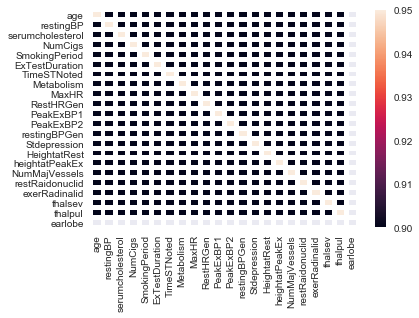

In [900]:
import seaborn as sns
corr = heart_train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=4,vmin = 0.95,vmax=0.9,
           annot =False)

#observation:-Numerical values are highly corelated

In [901]:
heart_train.corr()>0.9

,age,restingBP,serumcholesterol,NumCigs,SmokingPeriod,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,...,restingBPGen,Stdepression,HeightatRest,heightatPeakEx,NumMajVessels,restRaidonuclid,exerRadinalid,thalsev,thalpul,earlobe
age,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
restingBP,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
serumcholesterol,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
NumCigs,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
SmokingPeriod,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
ExTestDuration,False,False,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
TimeSTNoted,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Metabolism,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
MaxHR,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
RestHRGen,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


#Outliers handling:-

In [902]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))

In [903]:
heart_train.loc[:,num_cols].apply(outliers_iqr)
heart_test.loc[:,num_cols].apply(outliers_iqr)

age                 ([],)
restingBP           ([],)
serumcholesterol    ([],)
NumCigs             ([],)
SmokingPeriod       ([],)
ExTestDuration      ([],)
TimeSTNoted         ([],)
Metabolism          ([],)
MaxHR               ([],)
RestHRGen           ([],)
PeakExBP1           ([],)
PeakExBP2           ([],)
restingBPGen        ([],)
Stdepression        ([],)
HeightatRest        ([],)
heightatPeakEx      ([],)
NumMajVessels       ([],)
restRaidonuclid     ([],)
exerRadinalid       ([],)
thalsev             ([],)
thalpul             ([],)
earlobe             ([],)
dtype: object

#Null value handling

In [904]:
print(heart_train.isnull().sum())
print(heart_test.isnull().sum())

age                      0
gender                   0
chestpainloc            46
painexertion            43
reliefbyrest            38
chestpaintype            0
restingBP               45
serumcholesterol        20
IsSmoker               101
NumCigs                 19
SmokingPeriod           20
FastingBS               62
FamHistory              60
restingECGRes            1
ECGspecsBetaBlocker     51
ECGspecsNitrates        50
ECGspecsCalci           49
ECGspecsdiuretic        62
ExTestDuration          44
TimeSTNoted             17
Metabolism              80
MaxHR                   43
RestHRGen               43
PeakExBP1               47
PeakExBP2               47
restingBPGen            45
ExInducedAngina         43
Stdepression            46
Slope                   40
HeightatRest            18
heightatPeakEx           6
NumMajVessels           20
restRaidonuclid         33
exerRadinalid           33
thalassemia             76
thalsev                 30
thalpul                 32
e

In [905]:
heart_train.shape[1]

49

In [906]:
def impute(df,num_cols,cat_cols):
    imp_num = Imputer(missing_values='NaN', strategy='median', axis=0)
    df[num_cols] = pd.DataFrame(imp_num.fit_transform(df[num_cols]), columns=num_cols)
    df[cat_cols] = df[cat_cols].replace('nan',np.NaN)
    df[cat_cols] =pd.DataFrame(df[cat_cols].apply(lambda x:x.fillna(x.value_counts().index[0])))

In [907]:
impute(heart_train,num_cols,cat_cols)
impute(heart_test,num_cols,cat_cols)

In [908]:
print(heart_train.isnull().sum())
print(heart_test.isnull().sum())

age                    0
gender                 0
chestpainloc           0
painexertion           0
reliefbyrest           0
chestpaintype          0
restingBP              0
serumcholesterol       0
IsSmoker               0
NumCigs                0
SmokingPeriod          0
FastingBS              0
FamHistory             0
restingECGRes          0
ECGspecsBetaBlocker    0
ECGspecsNitrates       0
ECGspecsCalci          0
ECGspecsdiuretic       0
ExTestDuration         0
TimeSTNoted            0
Metabolism             0
MaxHR                  0
RestHRGen              0
PeakExBP1              0
PeakExBP2              0
restingBPGen           0
ExInducedAngina        0
Stdepression           0
Slope                  0
HeightatRest           0
heightatPeakEx         0
NumMajVessels          0
restRaidonuclid        0
exerRadinalid          0
thalassemia            0
thalsev                0
thalpul                0
earlobe                0
LeftMaintrunk          0
ladproximation         0


#Dummy

In [911]:
heart_train = pd.get_dummies(columns=cat_cols, data=heart_train, 
                      prefix=cat_cols, prefix_sep="_", drop_first=True)

In [912]:
heart_test =pd.get_dummies(columns=cat_cols, data=heart_test, 
                      prefix=cat_cols, prefix_sep="_", drop_first=True)

In [915]:
set(heart_train.columns).difference(set(heart_test.columns))

{'LeftMaintrunk_1.0',
 'LeftMaintrunk_162.0',
 'Severity',
 'Slope_1.0',
 'thalassemia_2.0',
 'thalassemia_4.0',
 'thalassemia_5.0'}

In [916]:
d_cols=['LeftMaintrunk_1.0','LeftMaintrunk_162.0','Slope_1.0','thalassemia_4.0','thalassemia_2.0','thalassemia_5.0']
drop_fun(heart_train,d_cols)

In [917]:
set(heart_train.columns).difference(set(heart_test.columns))

{'Severity'}

In [918]:
heart_test.columns

Index(['age', 'restingBP', 'serumcholesterol', 'NumCigs', 'SmokingPeriod',
       'ExTestDuration', 'TimeSTNoted', 'Metabolism', 'MaxHR', 'RestHRGen',
       'PeakExBP1', 'PeakExBP2', 'restingBPGen', 'Stdepression',
       'HeightatRest', 'heightatPeakEx', 'NumMajVessels', 'restRaidonuclid',
       'exerRadinalid', 'thalsev', 'thalpul', 'earlobe', 'gender_1',
       'chestpainloc_1.0', 'painexertion_1.0', 'reliefbyrest_1.0',
       'chestpaintype_2', 'chestpaintype_3', 'chestpaintype_4', 'IsSmoker_1.0',
       'FastingBS_1.0', 'FamHistory_1.0', 'restingECGRes_1.0',
       'restingECGRes_2.0', 'ECGspecsBetaBlocker_1.0', 'ECGspecsNitrates_1.0',
       'ECGspecsCalci_1.0', 'ECGspecsdiuretic_1.0', 'ExInducedAngina_1.0',
       'Slope_2.0', 'Slope_3.0', 'thalassemia_3.0', 'thalassemia_6.0',
       'thalassemia_7.0', 'LeftMaintrunk_2.0', 'ladproximation_2.0',
       'laddistance_2.0', 'cxmain_2.0', 'ramus_2.0', 'obtuseMarginal1_2.0',
       'obtuseMarginal2_2.0', 'rcaproximation_2.0', 'rcadi

In [919]:
heart_train["Severity"] = heart_train["Severity"].astype('category')
heart_train.dtypes

age                         float64
restingBP                   float64
serumcholesterol            float64
NumCigs                     float64
SmokingPeriod               float64
ExTestDuration              float64
TimeSTNoted                 float64
Metabolism                  float64
MaxHR                       float64
RestHRGen                   float64
PeakExBP1                   float64
PeakExBP2                   float64
restingBPGen                float64
Stdepression                float64
HeightatRest                float64
heightatPeakEx              float64
NumMajVessels               float64
restRaidonuclid             float64
exerRadinalid               float64
thalsev                     float64
thalpul                     float64
earlobe                     float64
Severity                   category
gender_1                      uint8
chestpainloc_1.0              uint8
painexertion_1.0              uint8
reliefbyrest_1.0              uint8
chestpaintype_2             

In [923]:
heart_train.shape[1]

57

In [924]:
heart_test.shape[1]

56

#Standardise

In [925]:
heart_train.head(10)

,age,restingBP,serumcholesterol,NumCigs,SmokingPeriod,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,...,laddistance_2.0,cxmain_2.0,ramus_2.0,obtuseMarginal1_2.0,obtuseMarginal2_2.0,rcaproximation_2.0,rcadistance_2.0,Location_Hungarian,Location_Switzerland,Location_Va
0,37.0,118.0,240.0,19.0,19.0,12.0,6.0,13.0,165.0,63.0,...,0,0,0,0,0,0,0,0,0,1
1,41.0,126.0,306.0,0.0,0.0,7.0,6.0,8.0,163.0,94.0,...,0,0,0,0,0,0,0,0,0,0
2,54.0,120.0,171.0,19.0,19.0,13.0,10.0,7.0,137.0,68.0,...,0,0,0,0,0,0,0,1,0,0
3,44.0,130.0,215.0,19.0,19.0,5.0,6.0,3.0,135.0,82.0,...,0,0,0,0,0,0,0,1,0,0
4,58.0,130.0,251.0,19.0,19.0,12.0,6.0,5.0,110.0,58.0,...,0,0,0,0,0,0,0,1,0,0
5,63.0,130.0,0.0,50.0,19.0,5.2,6.0,5.0,111.0,71.0,...,0,1,0,1,1,1,0,0,0,1
6,42.0,120.0,295.0,40.0,20.0,10.5,6.0,11.0,162.0,77.0,...,0,0,0,0,0,0,0,0,0,0
7,66.0,120.0,302.0,20.0,30.0,8.0,0.0,9.0,151.0,73.0,...,0,0,0,0,0,0,0,0,0,0
8,52.0,140.0,100.0,19.0,19.0,7.5,6.0,6.0,138.0,100.0,...,0,0,0,0,0,0,0,1,0,0
9,56.0,125.0,0.0,19.0,19.0,6.5,6.0,100.0,103.0,55.0,...,0,1,0,0,0,1,0,0,1,0


In [926]:
heart_test.head(10)

,age,restingBP,serumcholesterol,NumCigs,SmokingPeriod,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,...,laddistance_2.0,cxmain_2.0,ramus_2.0,obtuseMarginal1_2.0,obtuseMarginal2_2.0,rcaproximation_2.0,rcadistance_2.0,Location_Hungarian,Location_Switzerland,Location_Va
0,71.0,160.0,302.0,40.0,50.0,5.5,5.5,5.0,162.0,93.0,...,0,0,0,0,0,0,0,0,0,0
1,60.0,140.0,293.0,30.0,48.0,6.0,3.0,8.0,170.0,94.0,...,1,0,0,0,0,1,0,0,0,0
2,53.0,120.0,0.0,19.0,19.0,10.0,0.0,125.0,95.0,56.0,...,1,0,1,1,0,1,1,0,1,0
3,37.0,130.0,283.0,19.0,19.0,10.0,6.0,5.0,98.0,58.0,...,0,0,0,0,0,0,0,1,0,0
4,51.0,130.0,0.0,40.0,30.0,8.0,6.0,7.0,138.0,74.0,...,0,1,0,0,0,1,0,0,0,1
5,55.0,130.0,245.0,30.0,18.0,8.0,6.0,7.0,138.0,74.0,...,0,0,0,0,0,1,0,0,0,1
6,64.0,130.0,258.0,0.0,0.0,9.0,6.0,9.0,130.0,72.0,...,0,0,0,0,0,1,0,0,0,1
7,54.0,125.0,273.0,50.0,30.0,10.5,6.0,13.0,152.0,67.0,...,0,0,0,0,0,0,0,0,0,0
8,55.0,110.0,214.0,0.0,0.0,4.0,6.0,4.0,180.0,139.0,...,0,0,0,0,0,0,0,0,0,1
9,50.0,160.0,0.0,19.0,19.0,6.0,6.0,75.0,110.0,74.0,...,0,0,0,0,0,1,0,0,1,0


In [927]:
from sklearn.preprocessing import  StandardScaler
def Standardize(df,num_cols):
    scaler = StandardScaler(with_mean=True, with_std=True).fit(df[num_cols])
    df = pd.DataFrame(scaler.transform(df[num_cols]),columns=num_cols)
    return df

In [928]:
heart_train[num_cols]=Standardize(heart_train,num_cols)
heart_test[num_cols]=Standardize(heart_test,num_cols)

In [929]:
heart_train.head(10)

,age,restingBP,serumcholesterol,NumCigs,SmokingPeriod,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,...,laddistance_2.0,cxmain_2.0,ramus_2.0,obtuseMarginal1_2.0,obtuseMarginal2_2.0,rcaproximation_2.0,rcadistance_2.0,Location_Hungarian,Location_Switzerland,Location_Va
0,-1.767553,-0.738326,0.341249,0.032066,0.041774,0.924170,0.057176,-0.061750,1.100886,-0.869086,...,0,0,0,0,0,0,0,0,0,1
1,-1.344983,-0.299594,0.948431,-1.418937,-1.574428,-0.469570,0.057176,-0.240252,1.020331,1.391425,...,0,0,0,0,0,0,0,0,0,0
2,0.028370,-0.628643,-0.293531,0.032066,0.041774,1.202917,1.438425,-0.275953,-0.026892,-0.504487,...,0,0,0,0,0,0,0,1,0,0
3,-1.028056,-0.080228,0.111257,0.032066,0.041774,-1.027066,0.057176,-0.418755,-0.107447,0.516388,...,0,0,0,0,0,0,0,1,0,0
4,0.450940,-0.080228,0.442446,0.032066,0.041774,0.924170,0.057176,-0.347354,-1.114392,-1.233684,...,0,0,0,0,0,0,0,1,0,0
5,0.979153,-0.080228,-1.866683,2.399491,0.041774,-0.971317,0.057176,-0.347354,-1.074114,-0.285728,...,0,1,0,1,1,1,0,0,0,1
6,-1.239341,-0.628643,0.847234,1.635805,0.126838,0.506048,0.057176,-0.133151,0.980053,0.151790,...,0,0,0,0,0,0,0,0,0,0
7,1.296080,-0.628643,0.911632,0.108434,0.977471,-0.190822,-2.014697,-0.204552,0.536997,-0.139889,...,0,0,0,0,0,0,0,0,0,0
8,-0.182915,0.468187,-0.946711,0.032066,0.041774,-0.330196,0.057176,-0.311653,0.013386,1.828943,...,0,0,0,0,0,0,0,1,0,0
9,0.239655,-0.354436,-1.866683,0.032066,0.041774,-0.608944,0.057176,3.044189,-1.396336,-1.452443,...,0,1,0,0,0,1,0,0,1,0


In [930]:
heart_test.head(10)

,age,restingBP,serumcholesterol,NumCigs,SmokingPeriod,ExTestDuration,TimeSTNoted,Metabolism,MaxHR,RestHRGen,...,laddistance_2.0,cxmain_2.0,ramus_2.0,obtuseMarginal1_2.0,obtuseMarginal2_2.0,rcaproximation_2.0,rcadistance_2.0,Location_Hungarian,Location_Switzerland,Location_Va
0,1.972133,1.383473,0.986935,1.388518,2.541073,-0.804406,-0.148473,-0.386936,0.961767,1.027721,...,0,0,0,0,0,0,0,0,0,0
1,0.789046,0.343829,0.907236,0.674240,2.371643,-0.671135,-1.122278,-0.293343,1.267831,1.091347,...,1,0,0,0,0,1,0,0,0,0
2,0.036173,-0.695816,-1.687436,-0.111466,-0.085095,0.395031,-2.290844,3.356794,-1.601515,-1.326451,...,1,0,1,1,0,1,1,0,1,0
3,-1.684681,-0.175994,0.818680,-0.111466,-0.085095,0.395031,0.046288,-0.386936,-1.486742,-1.199198,...,0,0,0,0,0,0,0,1,0,0
4,-0.178934,-0.175994,-1.687436,1.388518,0.846771,-0.138052,0.046288,-0.324541,0.043576,-0.181178,...,0,1,0,0,0,1,0,0,0,1
5,0.251279,-0.175994,0.482170,0.674240,-0.169810,-0.138052,0.046288,-0.324541,0.043576,-0.181178,...,0,0,0,0,0,1,0,0,0,1
6,1.219260,-0.175994,0.597292,-1.468594,-1.694682,0.128490,0.046288,-0.262145,-0.262487,-0.308430,...,0,0,0,0,0,1,0,0,0,1
7,0.143726,-0.435905,0.730125,2.102796,0.846771,0.528302,0.046288,-0.137354,0.579188,-0.626562,...,0,0,0,0,0,0,0,0,0,0
8,0.251279,-1.215638,0.207648,-1.468594,-1.694682,-1.204218,0.046288,-0.418134,1.650410,3.954530,...,0,0,0,0,0,0,0,0,0,1
9,-0.286487,1.383473,-1.687436,-0.111466,-0.085095,-0.671135,0.046288,1.796906,-1.027646,-0.181178,...,0,0,0,0,0,1,0,0,1,0


In [931]:
heart_test.dtypes
heart_train.dtypes

age                         float64
restingBP                   float64
serumcholesterol            float64
NumCigs                     float64
SmokingPeriod               float64
ExTestDuration              float64
TimeSTNoted                 float64
Metabolism                  float64
MaxHR                       float64
RestHRGen                   float64
PeakExBP1                   float64
PeakExBP2                   float64
restingBPGen                float64
Stdepression                float64
HeightatRest                float64
heightatPeakEx              float64
NumMajVessels               float64
restRaidonuclid             float64
exerRadinalid               float64
thalsev                     float64
thalpul                     float64
earlobe                     float64
Severity                   category
gender_1                      uint8
chestpainloc_1.0              uint8
painexertion_1.0              uint8
reliefbyrest_1.0              uint8
chestpaintype_2             

#Learning Curve

In [932]:
Y_cols=['Severity']
X_cols = [i for i in heart_train if i not in Y_cols]
train_sizes=[100,300,537]

In [1052]:
train_sizes,train_scores,validation_scores = learning_curve(
                                                   estimator = LogisticRegression(), X = heart_train[X_cols],
                                                   y = heart_train[Y_cols], train_sizes = train_sizes, cv = 5,scoring='accuracy')

In [1053]:
train_sizes

array([100, 300, 537])

In [1054]:
train_scores

array([[0.85      , 0.9       , 0.9       , 0.9       , 0.9       ],
       [0.75666667, 0.75666667, 0.73333333, 0.74333333, 0.74333333],
       [0.72811918, 0.68901304, 0.7113594 , 0.72998138, 0.7113594 ]])

In [1055]:
validation_scores

array([[0.43065693, 0.44117647, 0.46666667, 0.40601504, 0.45864662],
       [0.54014599, 0.58823529, 0.58518519, 0.5112782 , 0.59398496],
       [0.59854015, 0.67647059, 0.63703704, 0.61654135, 0.62406015]])

In [1056]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 100   -0.890000
300   -0.746667
537   -0.713966
dtype: float64

 --------------------

Mean validation scores

 100   -0.440632
300   -0.563766
537   -0.630530
dtype: float64


(0, 40)

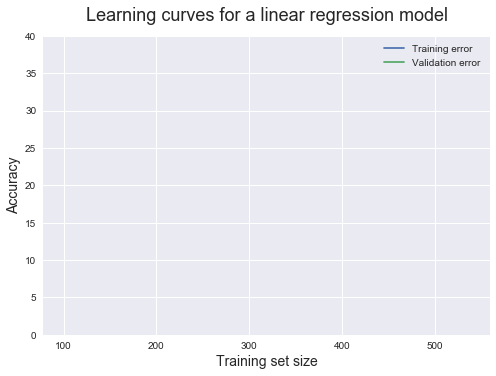

In [1058]:


plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,40)

### we can see that the model is behaving a lot better for train data than validation data.So low training error indicates low bias.bur high Validation error shows that it is a high variance problem

#Train Test Split:-

In [939]:
y = heart_train[Y_cols]
X = heart_train.drop(Y_cols,axis = 1)
X_train,X_test,y_train,y_test =train_test_split(X, y, test_size=0.2,random_state=769)

In [940]:
X_train.columns.values

array(['age', 'restingBP', 'serumcholesterol', 'NumCigs', 'SmokingPeriod',
       'ExTestDuration', 'TimeSTNoted', 'Metabolism', 'MaxHR',
       'RestHRGen', 'PeakExBP1', 'PeakExBP2', 'restingBPGen',
       'Stdepression', 'HeightatRest', 'heightatPeakEx', 'NumMajVessels',
       'restRaidonuclid', 'exerRadinalid', 'thalsev', 'thalpul',
       'earlobe', 'gender_1', 'chestpainloc_1.0', 'painexertion_1.0',
       'reliefbyrest_1.0', 'chestpaintype_2', 'chestpaintype_3',
       'chestpaintype_4', 'IsSmoker_1.0', 'FastingBS_1.0',
       'FamHistory_1.0', 'restingECGRes_1.0', 'restingECGRes_2.0',
       'ECGspecsBetaBlocker_1.0', 'ECGspecsNitrates_1.0',
       'ECGspecsCalci_1.0', 'ECGspecsdiuretic_1.0', 'ExInducedAngina_1.0',
       'Slope_2.0', 'Slope_3.0', 'thalassemia_3.0', 'thalassemia_6.0',
       'thalassemia_7.0', 'LeftMaintrunk_2.0', 'ladproximation_2.0',
       'laddistance_2.0', 'cxmain_2.0', 'ramus_2.0',
       'obtuseMarginal1_2.0', 'obtuseMarginal2_2.0', 'rcaproximation_2.0',

In [941]:
X_test.columns.values

array(['age', 'restingBP', 'serumcholesterol', 'NumCigs', 'SmokingPeriod',
       'ExTestDuration', 'TimeSTNoted', 'Metabolism', 'MaxHR',
       'RestHRGen', 'PeakExBP1', 'PeakExBP2', 'restingBPGen',
       'Stdepression', 'HeightatRest', 'heightatPeakEx', 'NumMajVessels',
       'restRaidonuclid', 'exerRadinalid', 'thalsev', 'thalpul',
       'earlobe', 'gender_1', 'chestpainloc_1.0', 'painexertion_1.0',
       'reliefbyrest_1.0', 'chestpaintype_2', 'chestpaintype_3',
       'chestpaintype_4', 'IsSmoker_1.0', 'FastingBS_1.0',
       'FamHistory_1.0', 'restingECGRes_1.0', 'restingECGRes_2.0',
       'ECGspecsBetaBlocker_1.0', 'ECGspecsNitrates_1.0',
       'ECGspecsCalci_1.0', 'ECGspecsdiuretic_1.0', 'ExInducedAngina_1.0',
       'Slope_2.0', 'Slope_3.0', 'thalassemia_3.0', 'thalassemia_6.0',
       'thalassemia_7.0', 'LeftMaintrunk_2.0', 'ladproximation_2.0',
       'laddistance_2.0', 'cxmain_2.0', 'ramus_2.0',
       'obtuseMarginal1_2.0', 'obtuseMarginal2_2.0', 'rcaproximation_2.0',

In [942]:
y_train.columns.values

array(['Severity'], dtype=object)

In [943]:
y_test['Severity'].values

[MildClass2, MildClass1, MildClass1, Moderate, None, ..., None, MildClass2, MildClass2, None, Moderate]
Length: 135
Categories (5, object): [MildClass1, MildClass2, Moderate, None, Severe]

In [944]:
X_train.shape[0]

539

In [945]:
X_test.shape[0]

135

#Models

In [946]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.metrics import precision_recall_fscore_support as score
def print_Results(clf_DT):
    train_pred = clf_DT.predict(X_train)
    test_pred = clf_DT.predict(X_test)
    confusion_matrix_test = confusion_matrix(y_test, test_pred,labels=['MildClass1', 'MildClass2', 'Moderate', 'None', 'Severe'])
    confusion_matrix_train = confusion_matrix(y_train, train_pred,labels=['MildClass1', 'MildClass2', 'Moderate', 'None', 'Severe'])
    print("Train Data confusion table :\n",confusion_matrix_train)
    print("Test Data confusion table :\n",confusion_matrix_test)
    precision_tr, recall_tr, fscore_tr, support_tr = score(y_train, train_pred)
    precision_te, recall_te, fscore_te, support_te = score(y_test, test_pred)
    print("Scores for train:-\n")
    print('precision: {}'.format(precision_tr))
    print('recall: {}'.format(recall_tr))
    print('fscore: {}'.format(fscore_tr))
    print('support: {}'.format(support_tr))
    print("Scores for test:-\n")
    print('precision: {}'.format(precision_te))
    print('recall: {}'.format(recall_te))
    print('fscore: {}'.format(fscore_te))
    print('support: {}'.format(support_te))


#DT

In [947]:
def decision_tree(X_train,y_train):
    print("THIS IS DECISION TREE MODEL")
    param_grid = {"criterion": ["entropy","gini"],
              "min_samples_split": [10,15,20],
              "max_depth": [None,5,10],
              "min_samples_leaf": [5,10],
              "max_leaf_nodes": [None,5,10],
              }
    dt = tree.DecisionTreeClassifier()
    clf_DT = GridSearchCV(dt, param_grid, cv=10,scoring='accuracy')
    #clf_DT=tree.DecisionTreeClassifier(criterion='gini')
    clf_DT.fit(X_train, y_train)
    print(clf_DT.best_params_)
    print_Results(clf_DT)
    return clf_DT 

In [948]:
clf_DT = decision_tree(X_train,y_train)

THIS IS DECISION TREE MODEL
{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': None, 'min_samples_leaf': 5, 'min_samples_split': 20}
Train Data confusion table :
 [[104   2   0   4   0]
 [ 15  56   9  19   0]
 [  0   9  75  31   0]
 [  0   0   3 174   0]
 [  7   1   0   0  30]]
Test Data confusion table :
 [[21  1  0  4  0]
 [ 6  9  2  2  0]
 [ 0  5 21  6  0]
 [ 0  0  4 47  0]
 [ 2  0  0  0  5]]
Scores for train:-

precision: [0.82539683 0.82352941 0.86206897 0.76315789 1.        ]
recall: [0.94545455 0.56565657 0.65217391 0.98305085 0.78947368]
fscore: [0.88135593 0.67065868 0.74257426 0.85925926 0.88235294]
support: [110  99 115 177  38]
Scores for test:-

precision: [0.72413793 0.6        0.77777778 0.79661017 1.        ]
recall: [0.80769231 0.47368421 0.65625    0.92156863 0.71428571]
fscore: [0.76363636 0.52941176 0.71186441 0.85454545 0.83333333]
support: [26 19 32 51  7]


In [975]:
Real_Pred_DT= clf_DT.predict(heart_test)

In [976]:
temp_DT= pd.read_csv("samplesubmission.csv")

In [977]:
temp_DT['Severity'] = Real_Pred_DT

In [978]:
temp_DT['Severity']= temp_DT['Severity'].astype('category')

In [979]:
temp_DT.to_csv('samplesubmission.csv',index=False)

#Random

In [949]:
def RandomForest(X_train,y_train):
    from sklearn.ensemble import RandomForestClassifier
    print("THIS IS RANDOM FOREST MODEL")
    param_grid = { "criterion": ["entropy","gini"],
           "n_estimators" : [200,300,400],
           "max_depth" : [10,20],
           "min_samples_leaf" : [5,10]}
    rfc = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
    clf_RF = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 10,scoring='accuracy')
    #clf_RF = RandomForestClassifier(n_jobs=-1, max_features='sqrt') 
    clf_RF.fit(X=X_train, y=y_train)
    print(clf_RF.best_params_)
    print_Results(clf_RF)
    return clf_RF

In [950]:
 clf_RF=RandomForest(X_train,y_train)

THIS IS RANDOM FOREST MODEL
{'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}
Train Data confusion table :
 [[107   0   0   3   0]
 [  5  72   0  22   0]
 [  2   0  76  37   0]
 [  3   0   0 174   0]
 [  8   0   0   0  30]]
Test Data confusion table :
 [[17  1  0  8  0]
 [ 5  3  8  3  0]
 [ 1  3 21  7  0]
 [ 0  0  0 51  0]
 [ 2  0  0  0  5]]
Scores for train:-

precision: [0.856      1.         1.         0.73728814 1.        ]
recall: [0.97272727 0.72727273 0.66086957 0.98305085 0.78947368]
fscore: [0.9106383  0.84210526 0.79581152 0.84261501 0.88235294]
support: [110  99 115 177  38]
Scores for test:-

precision: [0.68       0.42857143 0.72413793 0.73913043 1.        ]
recall: [0.65384615 0.15789474 0.65625    1.         0.71428571]
fscore: [0.66666667 0.23076923 0.68852459 0.85       0.83333333]
support: [26 19 32 51  7]


In [969]:
Real_Pred_RNDF= clf_RF.predict(heart_test)

In [971]:
temp_RF= pd.read_csv("samplesubmission.csv")

In [972]:
temp_RF['Severity'] = Real_Pred_RNDF

In [973]:
temp_RF['Severity']= temp_RF['Severity'].astype('category')

In [974]:
temp_RF.to_csv('samplesubmission.csv',index=False)

#XGB

In [951]:
def XGBoost(X_train,y_train):
    print("THIS IS XGBOOST MODEL")
    param_grid = {
    'colsample_bytree':[0.5,0.7,0.9],
    'n_estimators':[200,300,400,500],
    'max_depth': [5,10,15,20]}
    XGB = XGBClassifier(n_jobs=-1)
    clf_XG = GridSearchCV(estimator=XGB,param_grid=param_grid,cv=2,scoring='accuracy')
    #clf_XG=XGBClassifier(n_jobs=-1)
    clf_XG.fit(X_train,y_train)
    print(clf_XG.best_params_)
    print_Results(clf_XG)
    return clf_XG

In [952]:
clf_XG=XGBoost(X_train,y_train)

THIS IS XGBOOST MODEL
{'colsample_bytree': 0.9, 'max_depth': 15, 'n_estimators': 200}
Train Data confusion table :
 [[110   0   0   0   0]
 [  0  99   0   0   0]
 [  0   0 115   0   0]
 [  0   0   0 177   0]
 [  0   0   0   0  38]]
Test Data confusion table :
 [[15  8  0  2  1]
 [ 7  7  3  2  0]
 [ 1  0 24  7  0]
 [ 0  0  3 48  0]
 [ 1  0  1  0  5]]
Scores for train:-

precision: [1. 1. 1. 1. 1.]
recall: [1. 1. 1. 1. 1.]
fscore: [1. 1. 1. 1. 1.]
support: [110  99 115 177  38]
Scores for test:-

precision: [0.625      0.46666667 0.77419355 0.81355932 0.83333333]
recall: [0.57692308 0.36842105 0.75       0.94117647 0.71428571]
fscore: [0.6        0.41176471 0.76190476 0.87272727 0.76923077]
support: [26 19 32 51  7]


In [990]:
Real_Pred_XGB= clf_XG.predict(heart_test)
#heart_test.dtypes

In [964]:
temp = pd.read_csv("samplesubmission.csv")

In [965]:
temp['Severity'] = Real_Pred

In [966]:
temp['Severity']= temp['Severity'].astype('category')

In [968]:
temp.to_csv('samplesubmission.csv',index=False)